# Exploritory Analysis ⅠⅠ

Exploring Lightcurve and pixel data through the Lightkurve API

This exploritory analysis will look at:
- Downloading Target Pixel Images
- Apply Appereture Masks
- Converting to Lightcurves
- Removing instrument noise
- Folding Lightcurves 
- Identifying and visualising Exoplant Lightcurves

In [1]:
#imports
import pandas as pd
import numpy as np
import lightkurve as lk
from lightkurve import search_targetpixelfile
import matplotlib.pyplot as plt

In [2]:
# import the candidates file
file = ('../data/candidates/kepler_candidates.csv')
kep_df = pd.read_csv(file, low_memory = False)
kep_df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra_str,dec_str,koi_kepmag,koi_kepmag_err
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,19h27m44.22s,+48d08m29.9s,15.347,NaN
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,19h27m44.22s,+48d08m29.9s,15.347,NaN
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,4.544,0.044,-0.176,0.868,0.233,-0.078,19h48m01.16s,+48d08m02.9s,15.436,NaN
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,4.564,0.053,-0.168,0.791,0.201,-0.067,19h02m08.31s,+48d17m06.8s,15.597,NaN
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.438,0.070,-0.210,1.046,0.334,-0.133,19h15m01.17s,+48d13m34.3s,15.509,NaN


This file contains all the kepler confirmed exoplanets and possible candidates<br>
to be used for classification

#### Using the Kepler ID to download Target Pixel Files

<br>
other feature information that will be useful in this file are:
<br>
<br>
__kepid__ : int<br>
arget identification number, as listed in the Kepler Input Catalog (KIC). <br>
The KIC was derived from a ground-based imaging survey of the Kepler field <br>
conducted prior to launch. <br>
<br>
<br>
__koi_score__ : float <br>
A value between 0 and 1 that indicates the confidence in the KOI disposition.<br>
For CANDIDATEs, a higher value indicates more confidence in its disposition, <br>
while for FALSE POSITIVEs, a higher value indicates less confidence in that disposition.<br>
<br>
<br>
__koi_disposition__ : Char<br>
The category of this KOI from the Exoplanet Archive. Current values are CANDIDATE, <br>
FALSE POSITIVE, NOT DISPOSITIONED or CONFIRMED. All KOIs marked as CONFIRMED are also <br>
listed in the Exoplanet Archive Confirmed Planet table <br>
<br>
<br>
__koi_period__ : double <br>
The interval between consecutive planetary transits (days) <br>
<br>
<br>


Using a combination of the above, to gather and label the data for the machine learning <br>
models. First using the __kepid__ and the __koi_disposition__ to investigate <br>
the target pixel files of confirmed exoplanets.

### Investigate a known exoplanet

kepid_6922244 kepler name Kepler-8b is a known exoplanet in the dataset <br>
with a KOI score of 0.998 and a transit period of 3.522498 days <br>

#### Downloading and Visulizing the Target Pixel File

In [3]:
# check the dataset for the above entry
exo_df = kep_df.copy()
exo_df = exo_df[exo_df['kepid']==6922244]
exo_df = exo_df.reindex(columns=['kepid', 'koi_disposition', 'koi_score', 'koi_period'])
exo_df

,kepid,koi_disposition,koi_score,koi_period
12,6922244,CONFIRMED,0.998,3.522498


In [4]:
search_result = lk.search_targetpixelfile('KIC 6922244', author='Kepler')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 00,2009,Kepler,1800,kplr006922244,0.0
1,Kepler Quarter 01,2009,Kepler,1800,kplr006922244,0.0
2,Kepler Quarter 02,2009,Kepler,60,kplr006922244,0.0
3,Kepler Quarter 02,2009,Kepler,60,kplr006922244,0.0
4,Kepler Quarter 02,2009,Kepler,60,kplr006922244,0.0
5,Kepler Quarter 02,2009,Kepler,1800,kplr006922244,0.0
6,Kepler Quarter 03,2009,Kepler,60,kplr006922244,0.0
7,Kepler Quarter 03,2009,Kepler,60,kplr006922244,0.0
8,Kepler Quarter 03,2009,Kepler,60,kplr006922244,0.0


There are 49 results for when this star was individually imaged

In [5]:
# get the most recent quarter of when the starr was imaged from the mission column of the search results
most_recent = len(search_result.mission)
details = search_result.mission[most_recent-1]
details

'Kepler Quarter 17'

In [6]:
# get the quarter to use for search properties
qtr = details[-2:]
qtr = int(qtr)
qtr

17

In [7]:
# search for the collection of target pixel files for this quarter
tpf = search_targetpixelfile('KIC 6922244', author="Kepler",quarter=qtr, cadence="long").download()
tpf

KeplerTargetPixelFile Object (ID: 6922244)

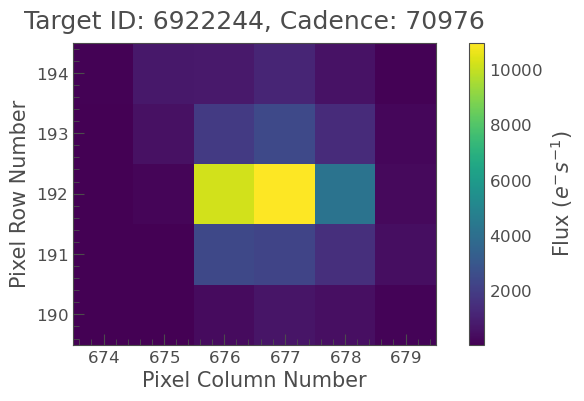

In [8]:
# plot the first of the images
tpf.plot(frame=0)
plt.savefig('./graphs/target_pixel_6922244.jpg', bbox_inches="tight", dpi=300)
plt.show()

Pixel images contain the flux data needed to identify the exoplanet<br>
as well as create the dataset needed for the machine learning models <br>

In [9]:
# print the flux values for this image
tpf.flux[0]

<Quantity [[7.2558980e+00, 4.8024983e+00, 3.0818060e+02, 6.1595422e+02,
            4.3719757e+02, 1.2624071e+02],
           [2.9922783e+01, 4.8180481e+01, 2.3802974e+03, 2.2583381e+03,
            1.4784050e+03, 4.1789645e+02],
           [1.6620655e+01, 1.4623305e+02, 1.0224450e+04, 1.2988257e+04,
            4.1885552e+03, 2.9648846e+02],
           [2.3350971e+01, 4.8631332e+02, 1.8756599e+03, 2.4270447e+03,
            1.3681051e+03, 1.8265903e+02],
           [6.5593941e+01, 7.1782678e+02, 7.5627301e+02, 1.1239242e+03,
            5.2166217e+02, 7.0447990e+01]] electron / s>

An apereture mask can be applied to the image to visualise the pixel sources of the Flux readings

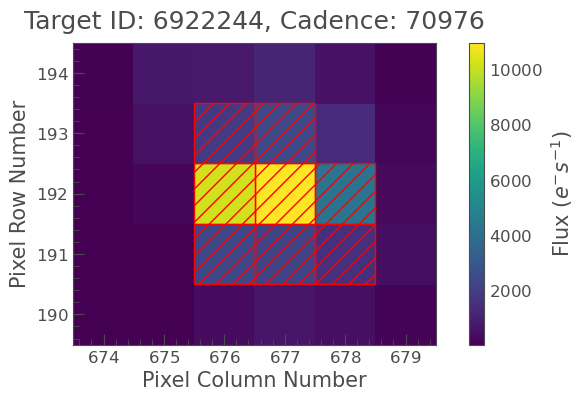

In [10]:
# plot an apereture mask overlayed on the image
tpf.plot(aperture_mask=tpf.pipeline_mask);
plt.savefig('./graphs/target_pixel_ap_mask_6922244.jpg', bbox_inches="tight", dpi=300)
plt.show()

With the LightKurve package it is possible to interact with the pixel files

In [11]:
# run interataaction
tpf.interact()

#### Converting the Target Pixel File to useable Lightcurve

In [12]:
# convert the collection of targte pixel files to a lightcurve
lc =  tpf.to_lightcurve(aperture_mask='all')
lc

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
object,float32,float32,float64,float64,int32,int32
1559.2266409377262,45592.14453125,10.228622436523438,676.8112972450118,192.07152290905165,70976,0
1559.2470752079025,45620.26171875,10.229371070861816,676.8119858259928,192.07197517008095,70977,0
1559.267509578196,45591.25390625,10.22878646850586,676.810995831429,192.07181150973543,70978,0
1559.2879440486286,45591.44921875,10.22887897491455,676.8105453842174,192.07154026954547,70979,0
1559.3083783191832,45591.8125,10.22874927520752,676.8112823546404,192.0720303438852,70980,0
1559.328812689855,45609.59765625,10.229267120361328,676.8105852046192,192.07231446325775,70981,0
1559.3492471606369,45596.43359375,10.228636741638184,676.8114198720602,192.07225536266174,70982,0
1559.3696814315408,45591.1796875,10.22861385345459,676.8110931580934,192.07222875247868,70983,0


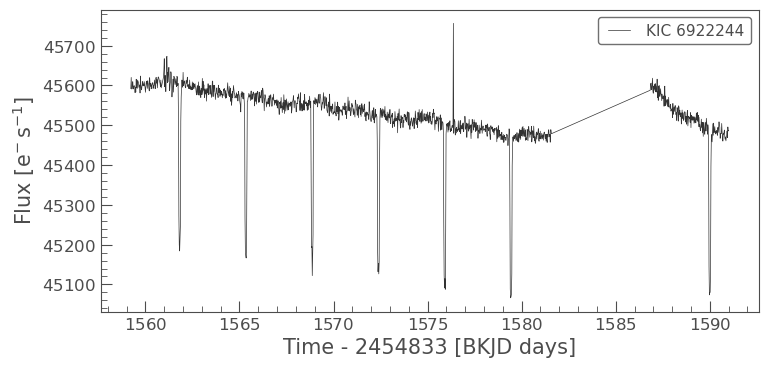

In [13]:
# visualisng the light curve
lc.plot()
plt.savefig('./graphs/lc_unclean_6922244.jpg', bbox_inches="tight", dpi=300)
plt.show()

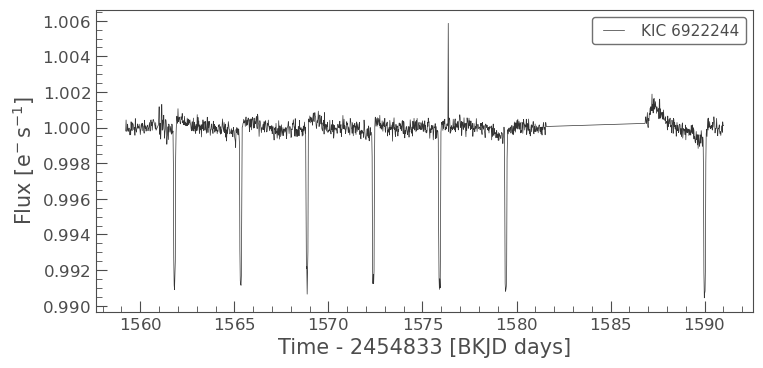

In [14]:
# removing the nans and flattening the lightcurve and replot
lc = lc.remove_nans().flatten(window_length=401)
lc.plot()
plt.savefig('./graphs/lc_nan_removed_6922244.jpg', bbox_inches="tight", dpi=300)
plt.show()

There are visual dips in the lightcurve every 3 days approx.<br>
The period time from the candidates file can be used to select the <br>
time period to fold the lightcurve to better represent this dip.

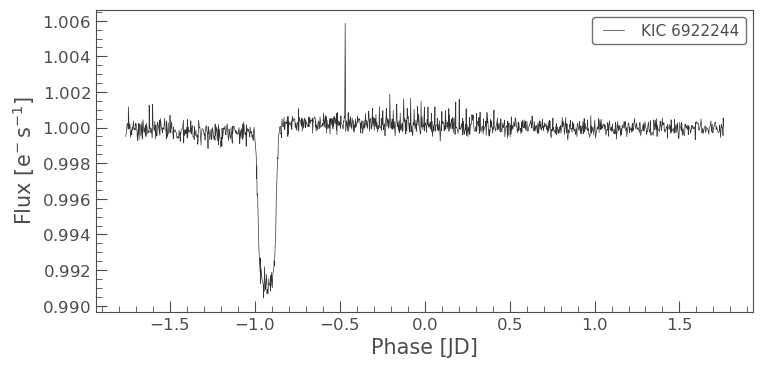

In [15]:
# using the koi period to set the folding anchor
fold_period = float(exo_df['koi_period'])

folded_lc = lc.fold(period=fold_period)
folded_lc.plot()
plt.savefig('./graphs/lc_folded_6922244.jpg', bbox_inches="tight", dpi=300)
plt.show()

The folded and flattened light curve can be normalised further to show a smoother line

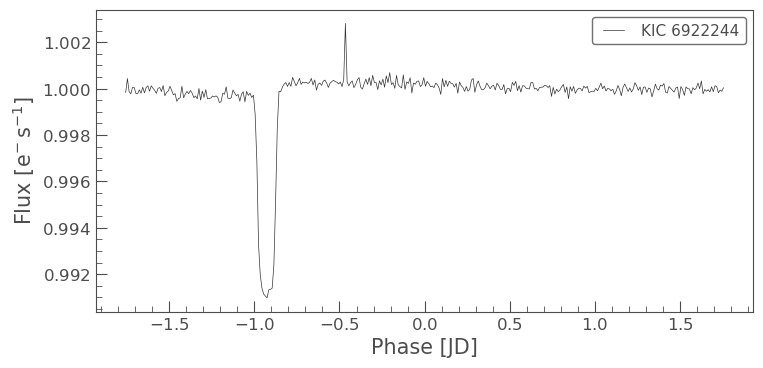

In [16]:
# normalise the folded lightcurve
normalised_lc = folded_lc.bin(time_bin_size=0.01)
normalised_lc.plot();
plt.savefig('./graphs/lc_normalised_6922244.jpg', bbox_inches="tight", dpi=300)
plt.show()

### Converting the Normalised lightcurve to pandas dataframe for export

the normalised light curve can be converted to a pandas dataframe<br>
and then can be transposed where the flux is a column of its own<br>
to be used in the classification dataset


In [17]:
# convert to df
df = normalised_lc.to_pandas()
df

,flux,flux_err,time_bin_start,time_bin_size,centroid_col,centroid_row,cadenceno,quality
time,,,,,,,,
-1.755269,0.999830,0.000130,-2 days +05:45:12.738832635,864.0,676.802260,192.088872,71464,0
-1.745269,1.000434,0.000130,-2 days +05:59:36.738832635,864.0,676.800804,192.093229,71695,2773
-1.735269,0.999868,0.000130,-2 days +06:14:00.738832635,864.0,676.802927,192.088854,71465,0
-1.725269,0.999774,0.000112,-2 days +06:28:24.738832635,864.0,676.801443,192.093874,71753,2048
-1.715269,1.000051,0.000130,-2 days +06:42:48.738832635,864.0,676.802476,192.088987,71466,2730
...,...,...,...,...,...,...,...,...
1.714731,1.000086,0.000129,1 days 17:02:00.738832634,864.0,676.798175,192.099280,71979,0
1.724731,0.999817,0.000130,1 days 17:16:24.738832634,864.0,676.802645,192.088611,71462,0
1.734731,0.999939,0.000112,1 days 17:30:48.738832634,864.0,676.800795,192.093972,71750,2112


In [18]:
# insert an incrimented column and convert to string
df.insert(0, 'Flux_', range(1, 1+len(df)))
df['Flux_'] = df['Flux_'].astype(str) 
# add increment to combined column
df['Flux'] = 'Flux ' + df['Flux_']
df

,Flux_,flux,flux_err,time_bin_start,time_bin_size,centroid_col,centroid_row,cadenceno,quality,Flux
time,,,,,,,,,,
-1.755269,1,0.999830,0.000130,-2 days +05:45:12.738832635,864.0,676.802260,192.088872,71464,0,Flux 1
-1.745269,2,1.000434,0.000130,-2 days +05:59:36.738832635,864.0,676.800804,192.093229,71695,2773,Flux 2
-1.735269,3,0.999868,0.000130,-2 days +06:14:00.738832635,864.0,676.802927,192.088854,71465,0,Flux 3
-1.725269,4,0.999774,0.000112,-2 days +06:28:24.738832635,864.0,676.801443,192.093874,71753,2048,Flux 4
-1.715269,5,1.000051,0.000130,-2 days +06:42:48.738832635,864.0,676.802476,192.088987,71466,2730,Flux 5
...,...,...,...,...,...,...,...,...,...,...
1.714731,348,1.000086,0.000129,1 days 17:02:00.738832634,864.0,676.798175,192.099280,71979,0,Flux 348
1.724731,349,0.999817,0.000130,1 days 17:16:24.738832634,864.0,676.802645,192.088611,71462,0,Flux 349
1.734731,350,0.999939,0.000112,1 days 17:30:48.738832634,864.0,676.800795,192.093972,71750,2112,Flux 350


In [19]:
# strip out only the flux reading
df = df.reindex(columns=['Flux', 'flux'])
df

,Flux,flux
time,,
-1.755269,Flux 1,0.999830
-1.745269,Flux 2,1.000434
-1.735269,Flux 3,0.999868
-1.725269,Flux 4,0.999774
-1.715269,Flux 5,1.000051
...,...,...
1.714731,Flux 348,1.000086
1.724731,Flux 349,0.999817
1.734731,Flux 350,0.999939


In [20]:
# transpose the column to a row and reset the index
df = df.set_index('Flux').T
df.reset_index(inplace=True)
df

Flux,index,Flux 1,Flux 2,Flux 3,Flux 4,Flux 5,Flux 6,Flux 7,Flux 8,Flux 9,...,Flux 343,Flux 344,Flux 345,Flux 346,Flux 347,Flux 348,Flux 349,Flux 350,Flux 351,Flux 352
0,flux,0.99983,1.000434,0.999868,0.999774,1.000051,1.000045,0.999787,0.999778,0.999946,...,0.999952,0.999857,1.000076,0.999867,1.000123,1.000086,0.999817,0.999939,0.999883,1.000038


In [21]:
# rename the column for the Kepler ID
df.rename(columns={'index':'ID'}, inplace=True)
df['ID'] = lc.meta['LABEL']
df

Flux,ID,Flux 1,Flux 2,Flux 3,Flux 4,Flux 5,Flux 6,Flux 7,Flux 8,Flux 9,...,Flux 343,Flux 344,Flux 345,Flux 346,Flux 347,Flux 348,Flux 349,Flux 350,Flux 351,Flux 352
0,KIC 6922244,0.99983,1.000434,0.999868,0.999774,1.000051,1.000045,0.999787,0.999778,0.999946,...,0.999952,0.999857,1.000076,0.999867,1.000123,1.000086,0.999817,0.999939,0.999883,1.000038


In [22]:
df.index.rename('Index', inplace=True)
df

Flux,ID,Flux 1,Flux 2,Flux 3,Flux 4,Flux 5,Flux 6,Flux 7,Flux 8,Flux 9,...,Flux 343,Flux 344,Flux 345,Flux 346,Flux 347,Flux 348,Flux 349,Flux 350,Flux 351,Flux 352
Index,,,,,,,,,,,,,,,,,,,,,
0,KIC 6922244,0.99983,1.000434,0.999868,0.999774,1.000051,1.000045,0.999787,0.999778,0.999946,...,0.999952,0.999857,1.000076,0.999867,1.000123,1.000086,0.999817,0.999939,0.999883,1.000038


In [23]:
# add the disposition for labeling
disposition = exo_df['koi_disposition'].values[0]
df.insert(1, 'disposition',disposition  )
df

Flux,ID,disposition,Flux 1,Flux 2,Flux 3,Flux 4,Flux 5,Flux 6,Flux 7,Flux 8,...,Flux 343,Flux 344,Flux 345,Flux 346,Flux 347,Flux 348,Flux 349,Flux 350,Flux 351,Flux 352
Index,,,,,,,,,,,,,,,,,,,,,
0,KIC 6922244,CONFIRMED,0.99983,1.000434,0.999868,0.999774,1.000051,1.000045,0.999787,0.999778,...,0.999952,0.999857,1.000076,0.999867,1.000123,1.000086,0.999817,0.999939,0.999883,1.000038


ERROR:bokeh.server.views.ws:Refusing websocket connection from Origin 'null';                       use --allow-websocket-origin= or set BOKEH_ALLOW_WS_ORIGIN= to permit this; currently we allow origins {'localhost:8888'}


### Dataset creation

This process can be done programatically (without) the visualisations <br>
to create the dataset for applying the classification models